<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

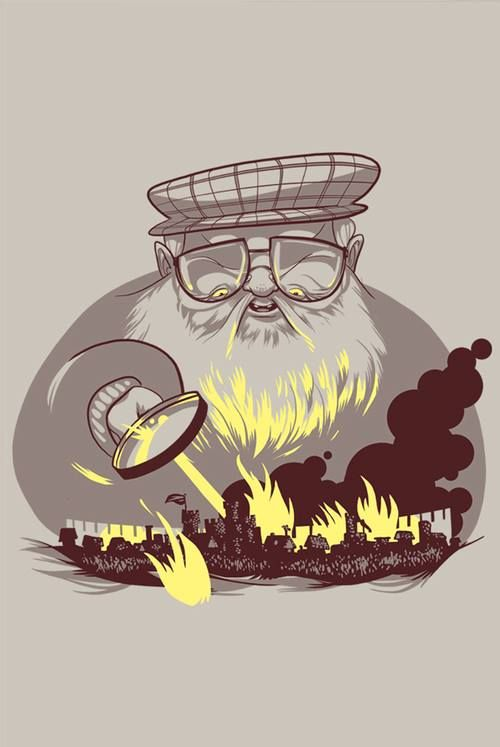

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 48.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 80.1MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.isna().mean().sort_values(ascending=False)

,0
isAliveMother,0.988439
mother,0.988439
isAliveHeir,0.986513
heir,0.986513
isAliveFather,0.985870
father,0.985870
isAliveSpouse,0.871548
spouse,0.871548
dateOfBirth,0.820809
age,0.820809


In [5]:
data.house

,house
S.No,
1,NaN
2,House Frey
3,House Swyft
4,House Arryn
5,House Santagar
...,...
1553,NaN
1554,NaN
1555,House Seaworth


In [6]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [7]:
naDrop = ['isAliveMother', 'mother', 'isAliveHeir', 'heir', 'isAliveFather',
          'father', 'isAliveSpouse', 'spouse', 'dateOfBirth', 'age', 'culture',
          'title', 'house']
data = data.drop(columns=naDrop)

In [8]:
data.isna().mean().sort_values(ascending=False)

,0
name,0.0
male,0.0
book1,0.0
book2,0.0
book3,0.0
book4,0.0
book5,0.0
isMarried,0.0
isNoble,0.0
numDeadRelations,0.0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [9]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data = data.drop(columns=['popularity', 'numDeadRelations'])

In [10]:
'''
Было принято морально - волевое решение дропнуть culture
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
'''

'\nБыло принято морально - волевое решение дропнуть culture\ncult = {\n    \'Summer Islands\': [\'summer islands\', \'summer islander\', \'summer isles\'],\n    \'Ghiscari\': [\'ghiscari\', \'ghiscaricari\',  \'ghis\'],\n    \'Asshai\': ["asshai\'i", \'asshai\'],\n    \'Lysene\': [\'lysene\', \'lyseni\'],\n    \'Andal\': [\'andal\', \'andals\'],\n    \'Braavosi\': [\'braavosi\', \'braavos\'],\n    \'Dornish\': [\'dornishmen\', \'dorne\', \'dornish\'],\n    \'Myrish\': [\'myr\', \'myrish\', \'myrmen\'],\n    \'Westermen\': [\'westermen\', \'westerman\', \'westerlands\'],\n    \'Westerosi\': [\'westeros\', \'westerosi\'],\n    \'Stormlander\': [\'stormlands\', \'stormlander\'],\n    \'Norvoshi\': [\'norvos\', \'norvoshi\'],\n    \'Northmen\': [\'the north\', \'northmen\'],\n    \'Free Folk\': [\'wildling\', \'first men\', \'free folk\'],\n    \'Qartheen\': [\'qartheen\', \'qarth\'],\n    \'Reach\': [\'the reach\', \'reach\', \'reachmen\'],\n}\n'

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [11]:
data.columns

Index(['name', 'male', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'isAlive', 'isPopular', 'boolDeadRelations'],
      dtype='object')

In [12]:
data.drop(columns=['name'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

<Axes: >

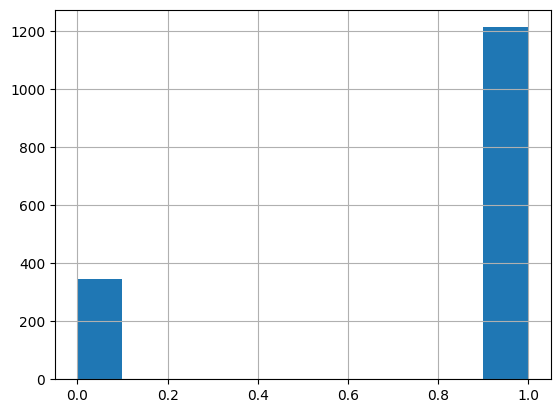

In [13]:
data.isAlive.hist()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [14]:
data.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,0,0,0,1,0,0,1,1,0,0
4,0,0,0,0,0,0,1,1,0,0,0
5,0,0,0,0,1,0,1,1,1,0,0


<Axes: >

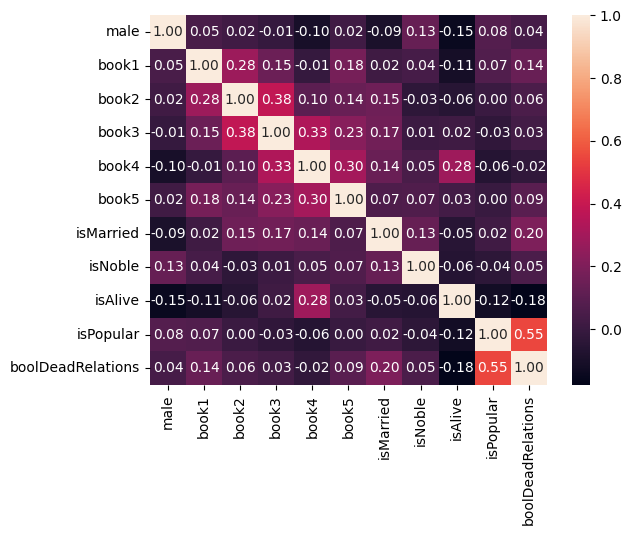

In [15]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [16]:
def plot_pie(data, col):
  data_1 = data[data[col]== 1]['isAlive'].value_counts().sort_values()
  data_2 = data[data[col]== 0]['isAlive'].value_counts().sort_values()

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

  ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
  ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

  ax1.set_title(f'isAlive ({col})', fontsize=10)
  ax2.set_title(f'isAlive (not {col})', fontsize=10)

  plt.legend(['Мертв', 'Жив'], fontsize=7)

  plt.show()

In [17]:
data.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'isAlive', 'isPopular', 'boolDeadRelations'],
      dtype='object')

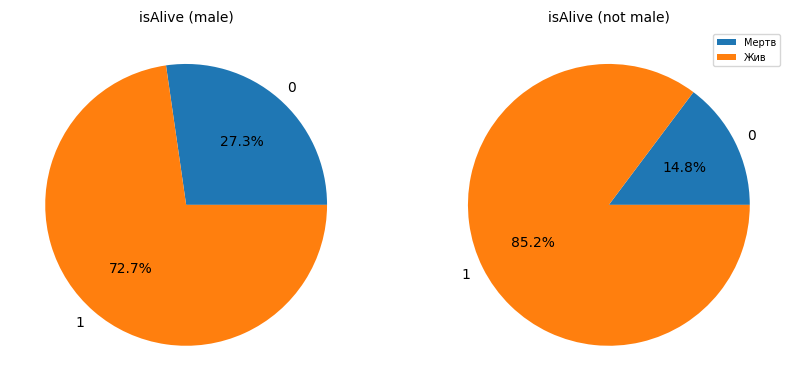

In [18]:
plot_pie(data, 'male')

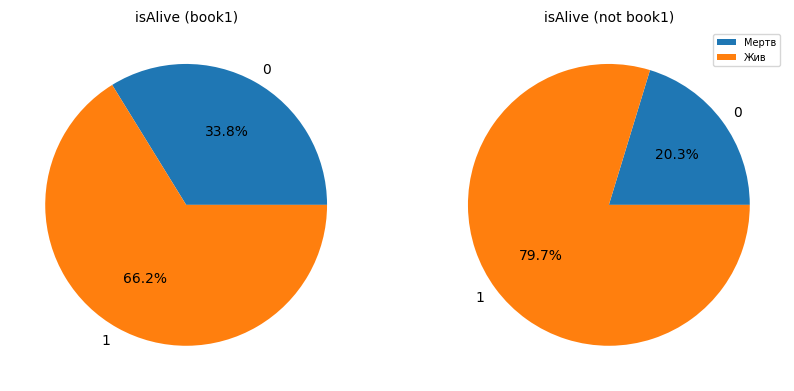

In [19]:
plot_pie(data, 'book1')

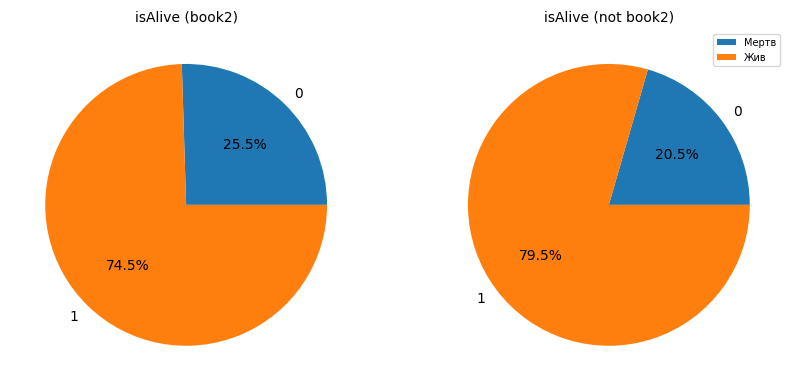

In [ ]:
plot_pie(data, 'book2')

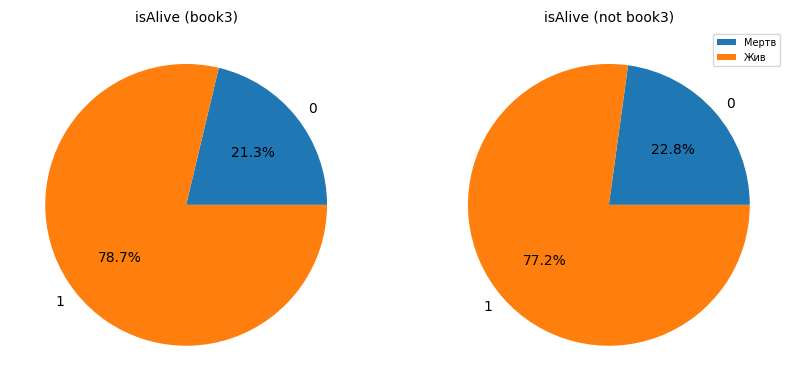

In [ ]:
plot_pie(data, 'book3')

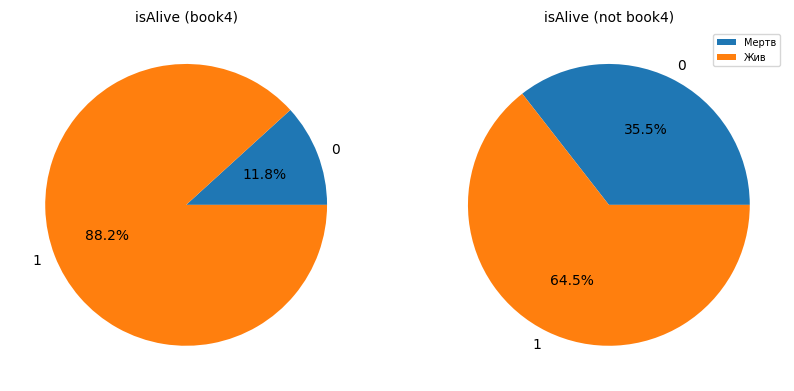

In [ ]:
plot_pie(data, 'book4')

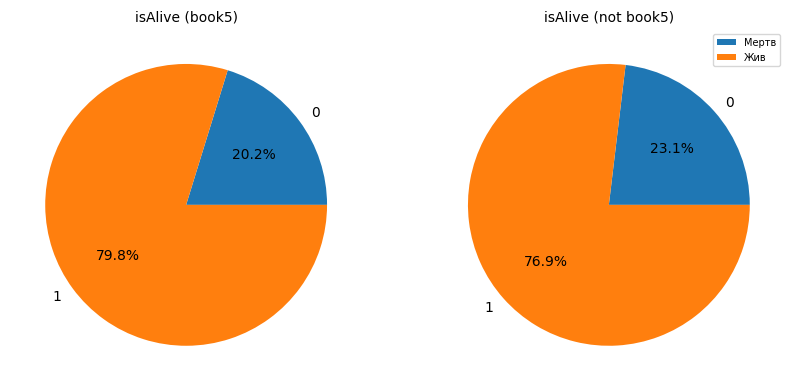

In [ ]:
plot_pie(data, 'book5')

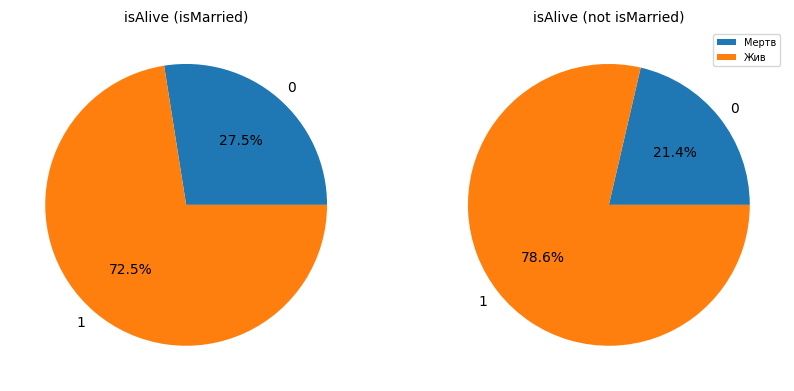

In [ ]:
plot_pie(data, 'isMarried')

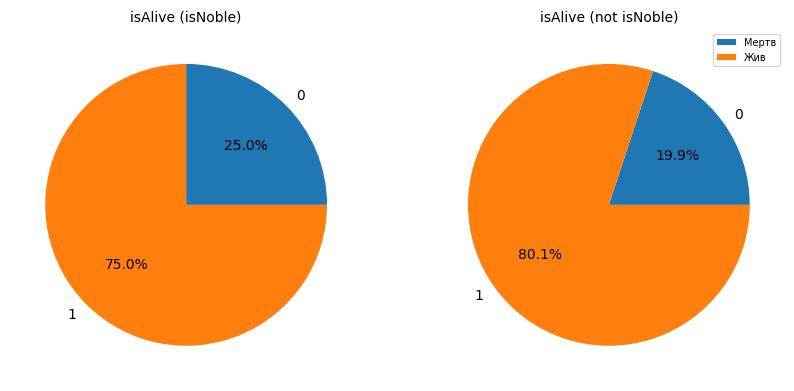

In [ ]:
plot_pie(data, 'isNoble')

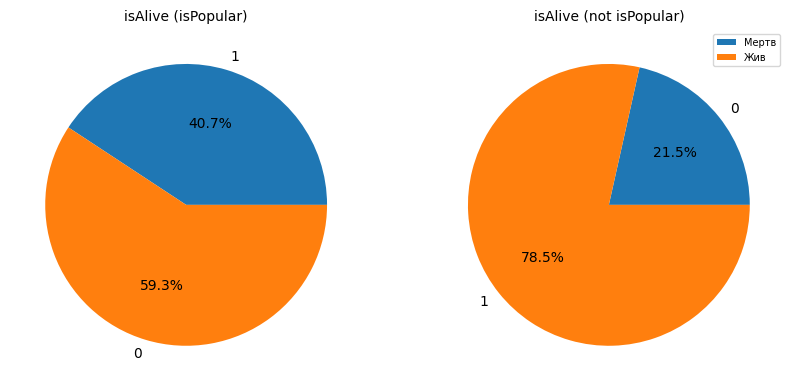

In [ ]:
plot_pie(data, 'isPopular')

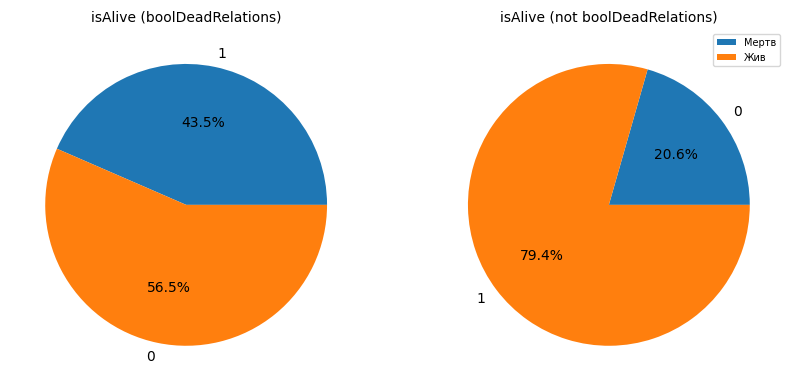

In [ ]:
plot_pie(data, 'boolDeadRelations')

In [20]:
data = data.drop(columns=['book3'])

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [21]:
data.head()

,male,book1,book2,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,0,0,1,0,0,1,1,0,0
4,0,0,0,0,0,1,1,0,0,0
5,0,0,0,1,0,1,1,1,0,0


In [24]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [27]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [28]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [29]:
y_preds = {}

In [30]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_preds['LogisticRegression'] = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [31]:
# Шаг 1. создание модели
ada = AdaBoostClassifier()

# Шаг 2. обучение модели
ada.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_preds['AdaBoostClassifier'] = ada.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [32]:
# Шаг 1. создание модели
rf = RandomForestClassifier()

# Шаг 2. обучение модели
rf.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_preds['RandomForestClassifier'] = rf.predict(X_test)

In [33]:
# Шаг 1. создание модели
gpc = GaussianProcessClassifier()

# Шаг 2. обучение модели
gpc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_preds['GaussianProcessClassifier'] = gpc.predict(X_test)

In [34]:
# Шаг 1. создание модели
gnb = GaussianNB()

# Шаг 2. обучение модели
gnb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_preds['GaussianNB'] = gnb.predict(X_test)

In [35]:
# Шаг 1. создание модели
knn = KNeighborsClassifier()

# Шаг 2. обучение модели
knn.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_preds['knn'] = knn.predict(X_test)

In [36]:
# Шаг 1. создание модели
svc = SVC()

# Шаг 2. обучение модели
svc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_preds['svc'] = svc.predict(X_test)

In [37]:
# Шаг 1. создание модели
dtc = DecisionTreeClassifier()

# Шаг 2. обучение модели
dtc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_preds['DecisionTreeClassifier'] = dtc.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [38]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [39]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7799


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [40]:
for k, v in y_preds.items():
  accuracy = accuracy_score(y_test, v)
  print(f"{k} accuracy: {accuracy}")

LogisticRegression accuracy: 0.7799145299145299
AdaBoostClassifier accuracy: 0.7799145299145299
RandomForestClassifier accuracy: 0.7777777777777778
GaussianProcessClassifier accuracy: 0.7905982905982906
GaussianNB accuracy: 0.7799145299145299
knn accuracy: 0.7884615384615384
svc accuracy: 0.7948717948717948
DecisionTreeClassifier accuracy: 0.7777777777777778


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [41]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.49MB/s]


In [42]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [43]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [44]:
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
data_test.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [45]:
data_test['isPopular'] = data_test['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data_test['boolDeadRelations'] = data_test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data_test = data_test.drop(columns=['popularity', 'numDeadRelations'])

In [46]:
data_test = data_test[data.drop(columns=['isAlive']).columns]

In [48]:
test_pred = svc.predict(data_test)

In [49]:
submission.isAlive = test_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [50]:
submission.to_csv("/content/new_submission.csv", index=False)